In [1]:
import warnings
from scipy.stats import ttest_ind
from itertools import combinations
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
warnings.simplefilter('ignore')

In [2]:
# Сохраним файл в переменную
df = pd.read_csv('stud_math.csv')

# Получим краткую информацию о датасете
display(df.info())
display(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

None

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


1 school — аббревиатура школы, в которой учится ученик
2 sex — пол ученика ('F' - женский, 'M' - мужской)
3 age — возраст ученика (от 15 до 22)
4 address — тип адреса ученика ('U' - городской, 'R' - за городом)
5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)
6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программ

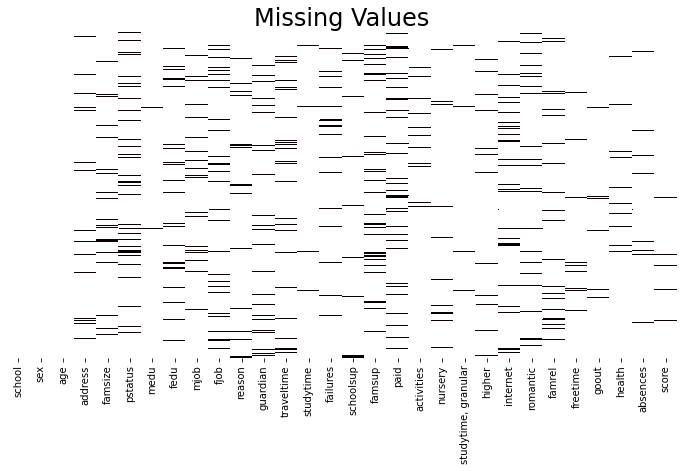

In [3]:
# Переименуем колонки для удобства (изменим заглавные буквы на строчные)
df.columns = ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score']

# Расшифровка колонок
with open('columns.txt', encoding='utf-8') as c:
    col = c.readlines()
for line in col:
    print(line.rstrip())

# Визуализируем пропущенные значения
fig = plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(df.isnull(), cbar=False, cmap='hot_r', yticklabels=[]).set_title('Missing Values', fontsize=24)

# Заполним пропуски и отфильтруем данные

### score

count    352.000000
mean      57.755682
std       16.200928
min       20.000000
25%       45.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

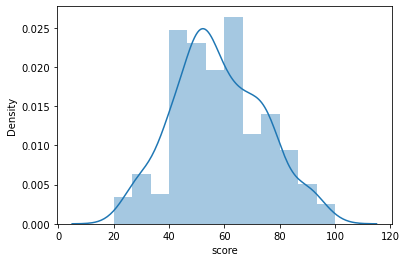

In [4]:
# Т.к. "оценка" ("score") это основной параметр, то просто удалим незаполненные строки
df = df[df.score.notna()]

#  В датасете присутсвует 37 значений 'score' равных '0'.
#  Т.к следующее значение равняется '25', то предположим,
# что 0 получили учащиеся, которые не явились на экзамен.
#  Поэтому эти строки также удаляем.
df = df.loc[df['score'] > 0]

sns.distplot(df.score)
df.score.describe()

### school

GP    311
MS     41
Name: school, dtype: int64

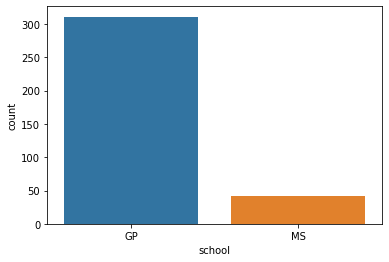

In [5]:
sns.countplot(data = df, x = df.school)
df.school.value_counts()

### sex

F    182
M    170
Name: sex, dtype: int64

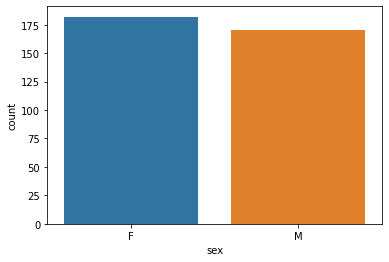

In [6]:
sns.countplot(data = df, x = df.sex)
df.sex.value_counts()

### age

15    76
16    96
17    90
18    69
19    16
20     3
21     1
22     1
Name: age, dtype: int64

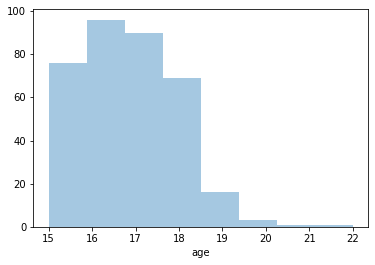

In [7]:
sns.distplot(df.age, kde = False, bins = 8)
df.age.value_counts().sort_index()

### address

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  338 non-null    object
dtypes: object(1)
memory usage: 15.5+ KB


None

U    265
R     73
Name: address, dtype: int64


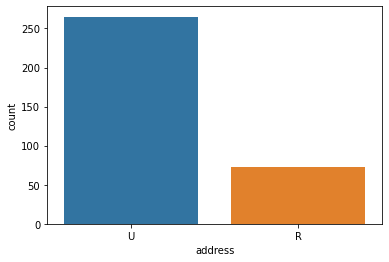

In [8]:
display(df.loc[:, ['address']].info())
sns.countplot(df.address)
print(df.address.value_counts())

# Заполним пропуски наиболее часто встречающимся значением
df.address.fillna(df.address.value_counts().idxmax(), inplace = True)

### family size

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  328 non-null    object
dtypes: object(1)
memory usage: 15.5+ KB
GT3    228
LE3    100
Name: famsize, dtype: int64


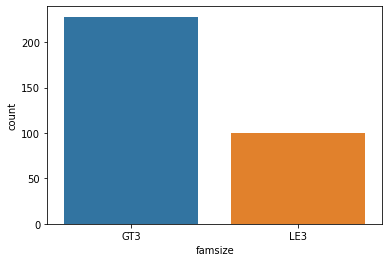

In [9]:
sns.countplot(df.famsize)
df.loc[:,['famsize']].info()
print(df.famsize.value_counts())

# Заполним пропуски наиболее часто встречающимся значением
df.famsize.fillna(df.famsize.value_counts().idxmax(), inplace = True)

### pstatus

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pstatus  311 non-null    object
dtypes: object(1)
memory usage: 15.5+ KB
T    277
A     34
Name: pstatus, dtype: int64


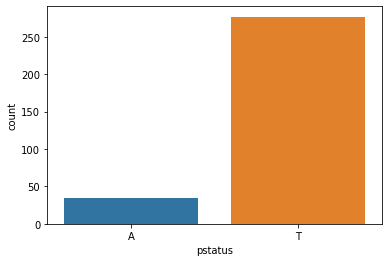

In [10]:
sns.countplot(df.pstatus)
df.loc[:,['pstatus']].info()
print(df.pstatus.value_counts())

# Заполним пропуски наиболее часто встречающимся значением
df.pstatus.fillna(df.pstatus.value_counts().idxmax(), inplace = True)

### medu

4.0    125
2.0     88
3.0     87
1.0     47
0.0      3
Name: medu, dtype: int64
Коэффицент корреляции показателей образования матери и отца: 0.24733885250194093


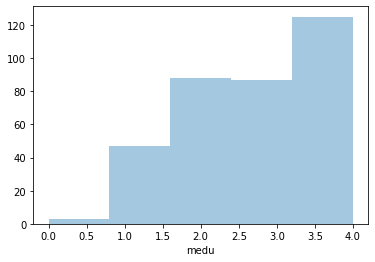

In [11]:
sns.distplot(df.medu, bins=5, kde=False)
print(df.medu.value_counts())
print(f'Коэффицент корреляции показателей образования матери и отца: {df.medu.corr(df.fedu)}')

#  Показатель образования матери сильно коррелирует с показателем образованием отца,
# поэтому проупуски заполним на основе другого показателя

def medu_filling(row):
    if pd.isnull(row['medu']):
        if row['fedu'] == 4:
            return 4
        if row['fedu'] == 3:
            return 3
        if row['fedu'] < 3:
            return 2
        if row['fedu'].isnull():
            return row['medu']
    return row['medu']


df.medu = df.apply(medu_filling, axis=1)

### fedu

2.0     94
3.0     89
4.0     80
1.0     65
0.0      2
40.0     1
Name: fedu, dtype: int64

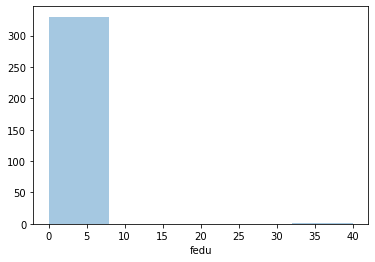

In [12]:
sns.distplot(df.fedu, bins = 5, kde = False)

df.fedu.value_counts()

In [13]:
# Имеется один выброс, значение которого - 40. Можно считать, что это опечатка. Изменим 40 на 4.
df.at[df.loc[df.fedu == 40].index, 'fedu'] = 4

#  Показатель образования отца сильно коррелирует с показателем образованием матери,
# поэтому пропуски заполним на основе другого показателя

def fedu_filling(row):
    if pd.isnull(row['fedu']):
        if row['medu'] == 4:
            return 4
        if row['medu'] == 3:
            return 3
        if row['medu'] == 2:
            return 2
        if row['medu'] < 2:
            return 1
        if row['medu'].isnull():
            return row['fedu']
    return row['fedu']

df.fedu = df.apply(fedu_filling, axis = 1)

### mjob

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mjob    335 non-null    object
dtypes: object(1)
memory usage: 15.5+ KB
other       115
services     90
teacher      51
at_home      49
health       30
Name: mjob, dtype: int64


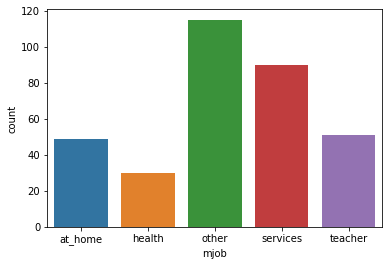

In [14]:
sns.countplot(df.mjob)
df.loc[:, ['mjob']].info()
print(df.mjob.value_counts())

# Пропуски заполним значением 'other'
df.mjob.fillna(df.mjob.value_counts().idxmax(), inplace = True)

### fjob

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fjob    320 non-null    object
dtypes: object(1)
memory usage: 15.5+ KB
other       176
services     89
teacher      26
health       15
at_home      14
Name: fjob, dtype: int64


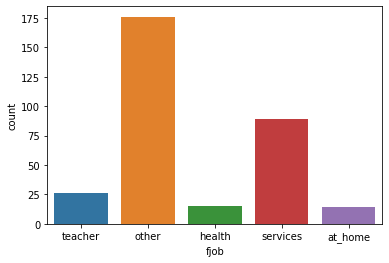

In [15]:
sns.countplot(df.fjob)
df.loc[:, ['fjob']].info()
print(df.fjob.value_counts())

# Пропуски заполним значением 'other'
df.fjob.fillna(df.fjob.value_counts().idxmax(), inplace = True)

### reason

course        119
reputation     96
home           89
other          33
Name: reason, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  337 non-null    object
dtypes: object(1)
memory usage: 15.5+ KB


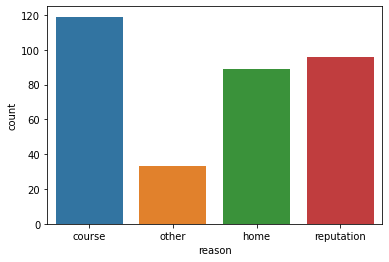

In [16]:
print(df.reason.value_counts())
sns.countplot(df.reason)
df.loc[:, ['reason']].info()

# Т.к. значения приблизительно равные и есть вариант "другое"("other"), именно им мы заполним пропуски
df.reason.fillna(df.reason.value_counts().idxmin(), inplace = True)

### guardian

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  323 non-null    object
dtypes: object(1)
memory usage: 15.5+ KB
mother    225
father     78
other      20
Name: guardian, dtype: int64


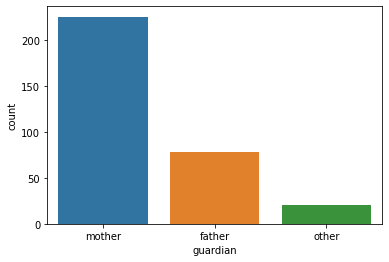

In [17]:
sns.countplot(df.guardian)
df.loc[:, ['guardian']].info()
print(df.guardian.value_counts())

# Заполним пропуски наиболее часто встречающимся значением
df.guardian.fillna(df.guardian.value_counts().idxmax(), inplace = True)

### travel time

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  329 non-null    float64
dtypes: float64(1)
memory usage: 15.5 KB
1.0    219
2.0     86
3.0     17
4.0      7
Name: traveltime, dtype: int64


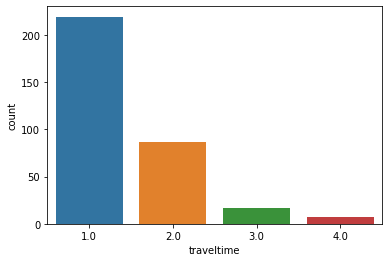

In [18]:
sns.countplot(df.traveltime)
df.loc[:, ['traveltime']].info()
print(df.traveltime.value_counts())

# Подавляющее большинство учеников живет рядом со школой, поэтому заполним пропуски "1"
df.traveltime.fillna(df.traveltime.value_counts().idxmax(), inplace = True)

### studytime

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  345 non-null    float64
dtypes: float64(1)
memory usage: 15.5 KB
2.0    173
1.0     90
3.0     58
4.0     24
Name: studytime, dtype: int64


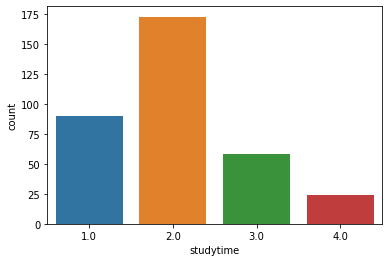

In [19]:
sns.countplot(df.studytime)
df.loc[:, ['studytime']].info()
print(df.studytime.value_counts())

# Заполним пропуски наиболее часто встречающимся значением
df.studytime.fillna(df.studytime.value_counts().idxmax(), inplace = True)

### failures

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  332 non-null    float64
dtypes: float64(1)
memory usage: 15.5 KB
0.0    273
1.0     38
2.0     11
3.0     10
Name: failures, dtype: int64


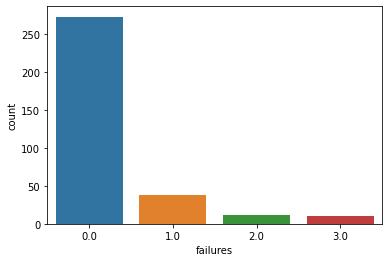

In [20]:
sns.countplot(df.failures)
df.loc[:, ['failures']].info()
print(df.failures.value_counts())

# Заполним пропуски наиболее часто встречающимся значением
df.failures.fillna(df.failures.value_counts().idxmax(), inplace = True)

### schoolsup

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  343 non-null    object
dtypes: object(1)
memory usage: 15.5+ KB
no     295
yes     48
Name: schoolsup, dtype: int64


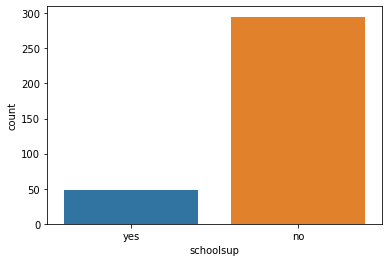

In [21]:
sns.countplot(df.schoolsup)
df.loc[:, ['schoolsup']].info()
print(df.schoolsup.value_counts())

# Заполним пропуски наиболее часто встречающимся значением
df.schoolsup.fillna(df.schoolsup.value_counts().idxmax(), inplace = True)

### famsup

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  316 non-null    object
dtypes: object(1)
memory usage: 15.5+ KB
yes    196
no     120
Name: famsup, dtype: int64


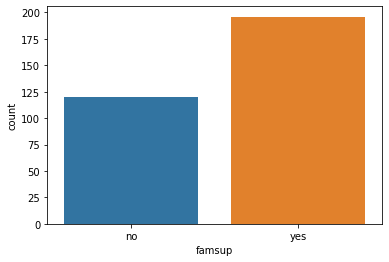

In [22]:
sns.countplot(df.famsup)
df.loc[:, ['famsup']].info()
print(df.famsup.value_counts())

# Заполним пропуски наиболее часто встречающимся значением
df.famsup.fillna(df.famsup.value_counts().idxmax(), inplace = True)

### paid

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    316 non-null    object
dtypes: object(1)
memory usage: 15.5+ KB
no     170
yes    146
Name: paid, dtype: int64


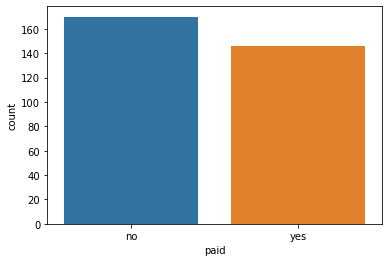

In [23]:
df.loc[:, ['paid']].info()
sns.countplot(df.paid)
print(df.paid.value_counts())

# Заполним пропуски наиболее часто встречающимся значением
df.paid.fillna(df.paid.value_counts().idxmax(), inplace=True)

### activities

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  340 non-null    object
dtypes: object(1)
memory usage: 15.5+ KB
yes    172
no     168
Name: activities, dtype: int64


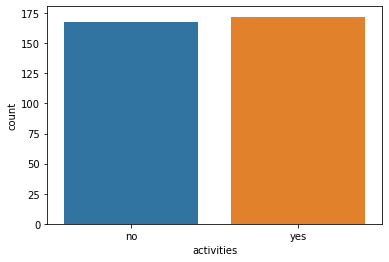

In [24]:
df.loc[:, ['activities']].info()
sns.countplot(df.activities)
print(df.activities.value_counts())

#  Т.к. значения практически равны, 
# заполним пропуски в зависимости от колонки "studytime" (время на учёбу помимо школы в неделю) 

def activities_filling(row):
    if pd.isnull(row['activities']):
        if row['studytime'] == 1:
            return 'no'
        if row['studytime'] > 1:
            return 'yes'
    return row['activities']

df.activities = df.apply(activities_filling, axis=1)

### nursery

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  340 non-null    object
dtypes: object(1)
memory usage: 15.5+ KB
yes    272
no      68
Name: nursery, dtype: int64


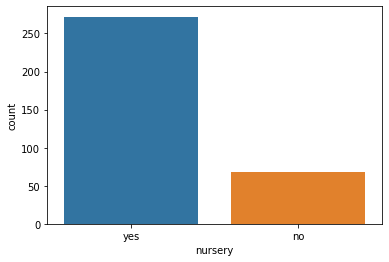

In [25]:
sns.countplot(df.nursery)
df.loc[:, ['nursery']].info()
print(df.nursery.value_counts())

# Заполним пропуски наиболее часто встречающимся значением
df.nursery.fillna(df.nursery.value_counts().idxmax(), inplace=True)

### higher

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  333 non-null    object
dtypes: object(1)
memory usage: 15.5+ KB
yes    320
no      13
Name: higher, dtype: int64


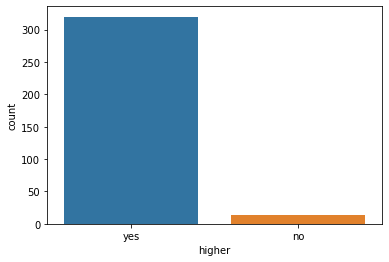

In [26]:
df.loc[:, ['higher']].info()
sns.countplot(df.higher)
print(df.higher.value_counts())

# Заполним пропуски наиболее часто встречающимся значением
df.higher.fillna(df.higher.value_counts().idxmax(), inplace=True)

### internet

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  323 non-null    object
dtypes: object(1)
memory usage: 15.5+ KB
yes    274
no      49
Name: internet, dtype: int64


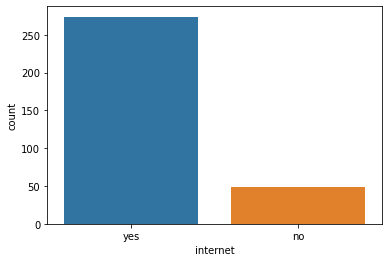

In [27]:
sns.countplot(df.internet)
df.loc[:, ['internet']].info()
print(df.internet.value_counts())

# Заполним пропуски наиболее часто встречающимся значением
df.internet.fillna(df.internet.value_counts().idxmax(), inplace=True)

### romantic

no     219
yes    104
Name: romantic, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  352 non-null    object
dtypes: object(1)
memory usage: 15.5+ KB


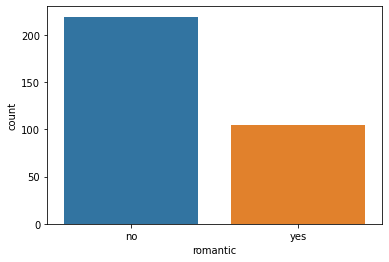

In [28]:
sns.countplot(df.romantic)
print(df.romantic.value_counts())

# Заполним пропуски наиболее часто встречающимся значением
df.romantic.fillna(df.romantic.value_counts().idxmax(), inplace=True)
df.loc[:, ['romantic']].info()

### famrel

 4.0    163
 5.0     88
 3.0     56
 2.0     14
 1.0      6
-1.0      1
Name: famrel, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  352 non-null    float64
dtypes: float64(1)
memory usage: 15.5 KB


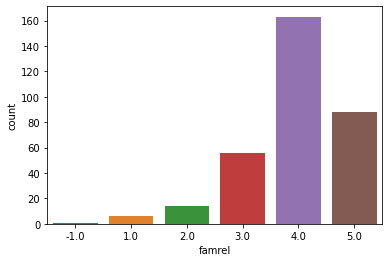

In [29]:
sns.countplot(df.famrel)
print(df.famrel.value_counts())

# Присутстувует один выброс. Скорее всего это опечатка - знак "-" лишний, уберем его
df.at[df.loc[df.famrel == -1].index, 'famrel'] = 1

# Заполним пропуски наиболее часто встречающимся значением
df.famrel.fillna(df.famrel.value_counts().idxmax(), inplace=True)
df.loc[:, ['famrel']].info()

### freetime

3.0    132
4.0    102
2.0     59
5.0     35
1.0     16
Name: freetime, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  352 non-null    float64
dtypes: float64(1)
memory usage: 15.5 KB


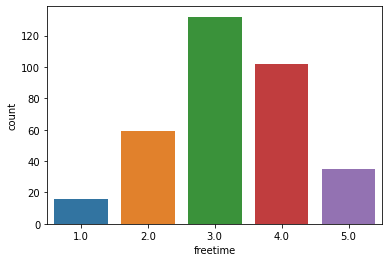

In [30]:
sns.countplot(df.freetime)
print(df.freetime.value_counts())

# Заполним пропуски наиболее часто встречающимся значением
df.freetime.fillna(df.freetime.value_counts().idxmax(), inplace=True)
df.loc[:, ['freetime']].info()

### goout

3.0    118
2.0     92
4.0     74
5.0     43
1.0     19
Name: goout, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   352 non-null    float64
dtypes: float64(1)
memory usage: 15.5 KB


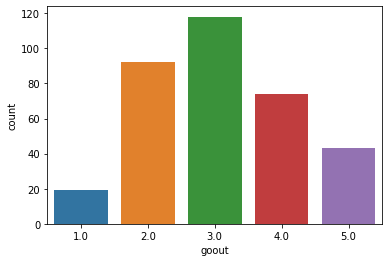

In [31]:
sns.countplot(df.goout)
print(df.goout.value_counts())

# Заполним пропуски наиболее часто встречающимся значением
df.goout.fillna(df.goout.value_counts().idxmax(), inplace=True)
df.loc[:, ['goout']].info()

### health

5.0    124
3.0     81
4.0     53
1.0     45
2.0     36
Name: health, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  352 non-null    float64
dtypes: float64(1)
memory usage: 15.5 KB


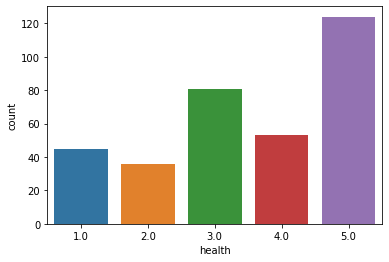

In [32]:
sns.countplot(df.health)
print(df.health.value_counts())

# Заполним пропуски наиболее часто встречающимся значением
df.health.fillna(df.health.value_counts().idxmax(), inplace=True)
df.loc[:, ['health']].info()

### absences

25-й перцентиль: 2.0, 75-й перцентиль: 8.0, IQR: 6.0, границы выбросов: [-7.0; 17.0]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  315 non-null    float64
dtypes: float64(1)
memory usage: 4.9 KB


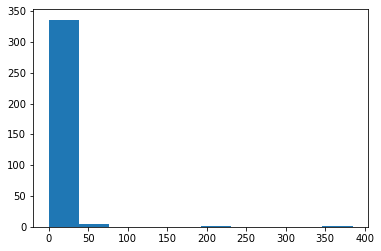

In [33]:
plt.hist(df.absences)

# Параметр содержит большое количество выбросов, давайте отфильтруем его
perc25 = df.absences.quantile(0.25)
perc75 = df.absences.quantile(.75)
IQR = perc75 - perc25
print(f'25-й перцентиль: {perc25}, 75-й перцентиль: {perc75}, IQR: {IQR}, границы выбросов: [{perc25 - 1.5*IQR}; {perc75 + 1.5*IQR}]')
df = df.loc[df.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

# Заполним пропуски наиболее часто встречающимся значением
df.absences.fillna(df.absences.value_counts().idxmax(), inplace=True)
df.loc[:, ['absences']].info()

(array([77., 67., 57., 30., 26., 20.,  2., 14., 14.,  8.]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <BarContainer object of 10 artists>)

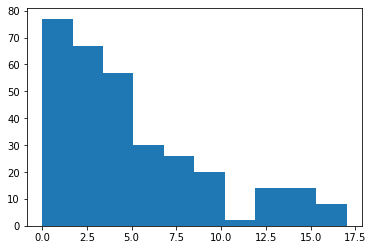

In [34]:
# Отобразим отфильтрованные данные
plt.hist(df.absences)

### Sudytime, granular

-6.0     152
-3.0      80
-9.0      54
-12.0     24
Name: studytime, granular, dtype: int64


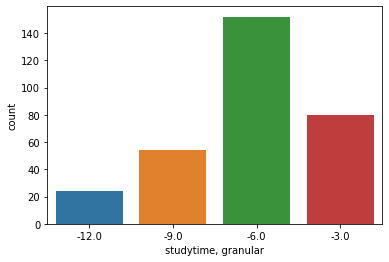

In [35]:
sns.countplot(df['studytime, granular'])
print(df['studytime, granular'].value_counts())

# Корреляционный анализ

,age,medu,fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.133718,-0.147318,0.089736,0.007086,0.207908,-0.007182,0.061900,0.025218,0.145354,-0.029952,0.193170,-0.139604
medu,-0.133718,1.000000,0.630662,-0.170595,0.082303,-0.211502,-0.082649,-0.003496,0.032193,0.042909,-0.068191,0.089002,0.189794
fedu,-0.147318,0.630662,1.000000,-0.138884,-0.014487,-0.285964,0.015279,-0.009580,0.012327,0.009667,-0.010167,-0.003602,0.130965
traveltime,0.089736,-0.170595,-0.138884,1.000000,-0.097248,0.094341,0.098330,-0.024009,0.014976,0.032417,0.002000,-0.048988,-0.080525
studytime,0.007086,0.082303,-0.014487,-0.097248,1.000000,-0.155113,-1.000000,0.054011,-0.135851,-0.016703,-0.082396,-0.054875,0.142071
failures,0.207908,-0.211502,-0.285964,0.094341,-0.155113,1.000000,0.156639,-0.007389,0.118827,0.097792,0.082216,0.178673,-0.285859
"studytime, granular",-0.007182,-0.082649,0.015279,0.098330,-1.000000,0.156639,1.000000,-0.054712,0.137974,0.016995,0.083147,0.054918,-0.143721
famrel,0.061900,-0.003496,-0.009580,-0.024009,0.054011,-0.007389,-0.054712,1.000000,0.165449,0.043266,0.111598,-0.103994,0.071313
freetime,0.025218,0.032193,0.012327,0.014976,-0.135851,0.118827,0.137974,0.165449,1.000000,0.295446,0.048916,0.083402,-0.014304
goout,0.145354,0.042909,0.009667,0.032417,-0.016703,0.097792,0.016995,0.043266,0.295446,1.000000,0.020106,0.168041,-0.198512


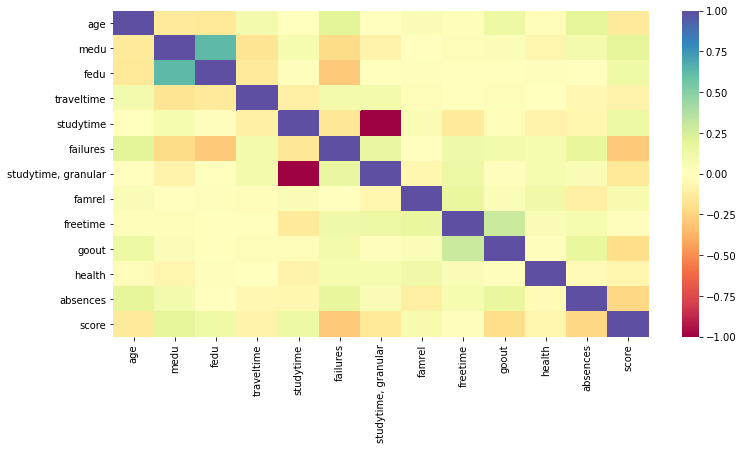

In [37]:
# Построим таблицу коррелиции и визуализируем её
fig = plt.figure(figsize=(12, 6))
ax = sns.heatmap(df.corr(), linecolor='black', cmap='Spectral')

df.corr()

In [42]:
#  "studytime" и "studytime, granular" полностью скоррелировны.
# Удалим "studytime, granular"
df.drop(columns=["studytime, granular"], inplace=True)

### Анализ номинативных признаков

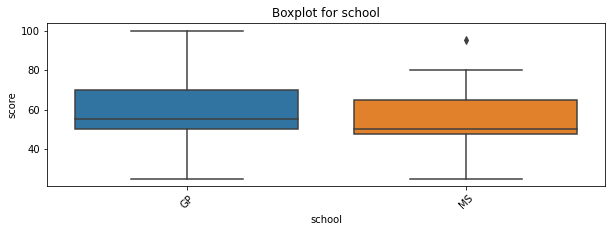

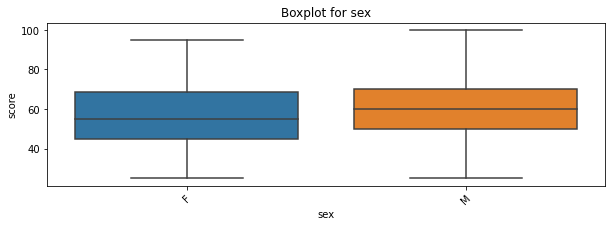

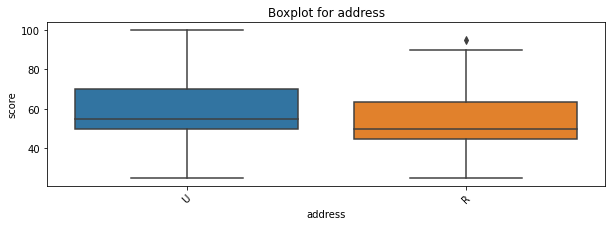

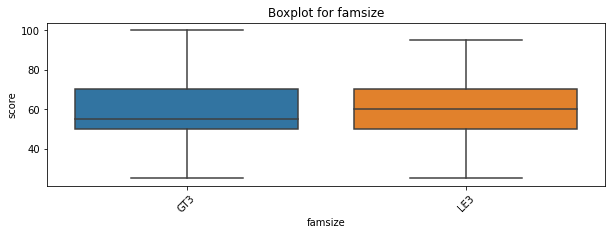

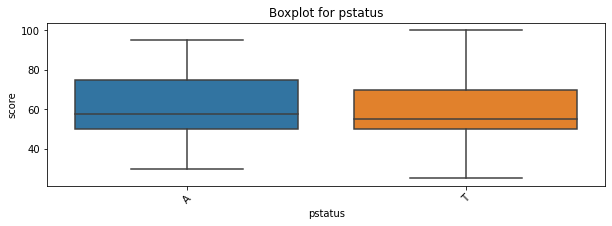

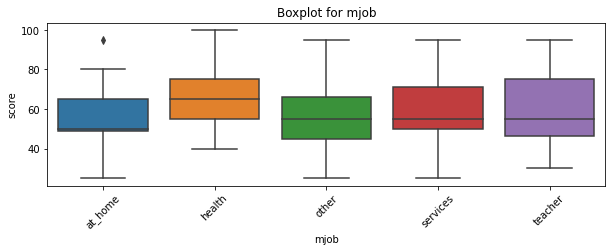

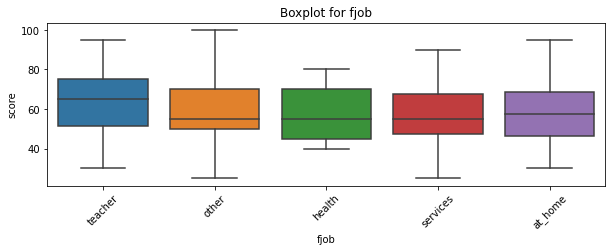

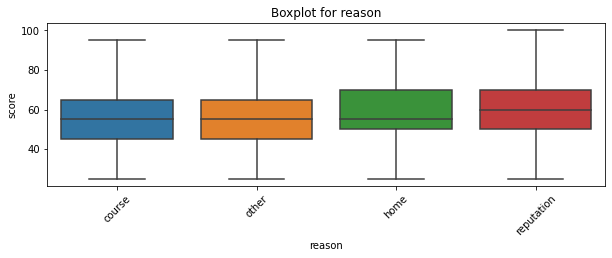

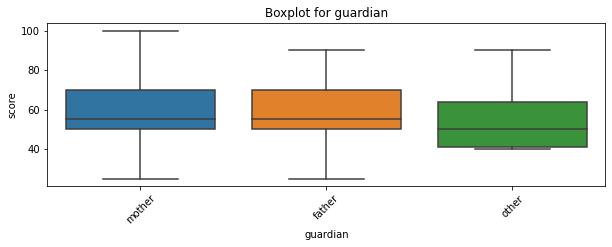

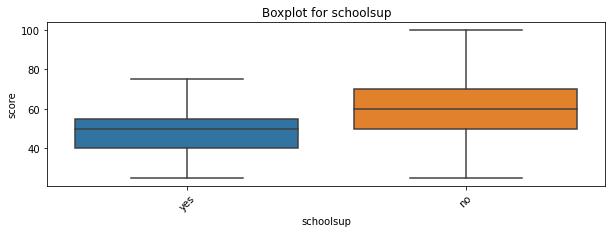

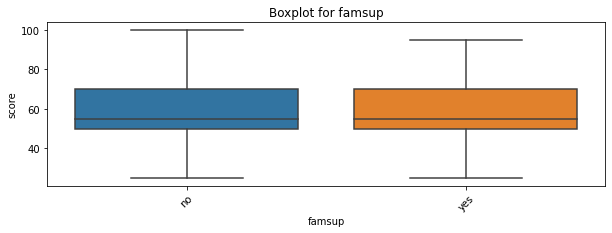

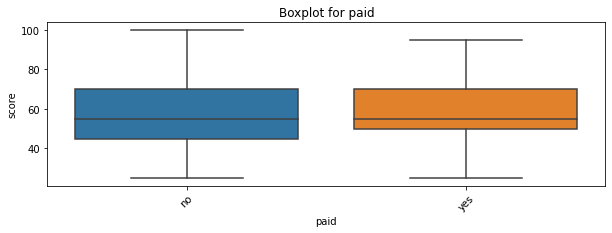

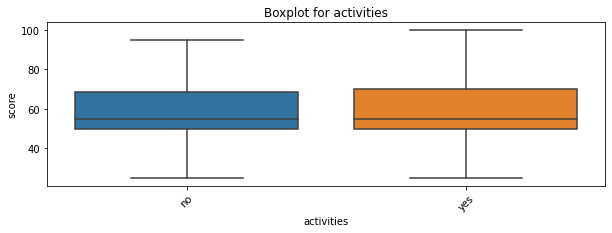

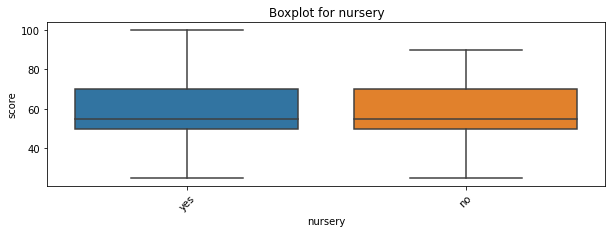

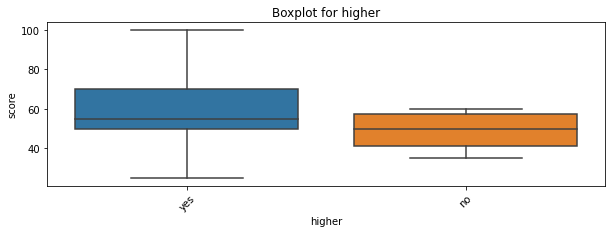

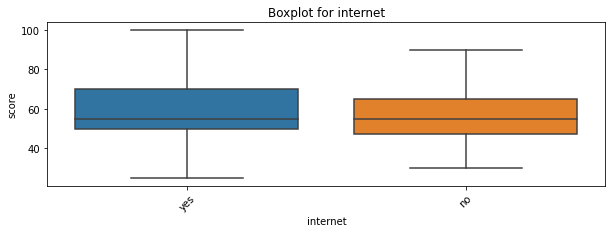

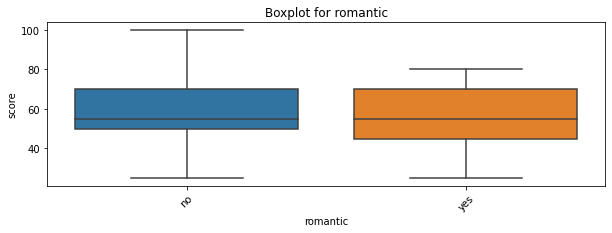

In [38]:
# Построим boxplot для каждого номинативного признака

def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(10, 3))
    sns.boxplot(x=column, y='score',
                data=df.loc[df.loc[:, column].isin(
                    df.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


for col in ['school', 'sex', 'address', 'famsize', 'pstatus',
            'mjob', 'fjob', 'reason', 'guardian',
            'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
            'higher', 'internet', 'romantic']:
    get_boxplot(col)

In [39]:
#  Проверим есть ли статистическая разница в распределении оценок по номинативным признакам, 
# с помощью теста Стьюдента.

def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'],
                     df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

for col in ['school', 'sex', 'address', 'famsize', 'pstatus',
       'mjob', 'fjob', 'reason', 'guardian',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки schoolsup


In [40]:
# Удалим статистически малозначимые признаки
df.drop(columns=['school', 'famsize', 'pstatus', 'fjob', 
                 'reason', 'guardian', 'famsup', 'paid', 
                 'activities', 'nursery', 'higher',
                 'internet', 'romantic'], inplace=True)

### Итоги

##### Удаляем колонку "studytime, granular", т.к она полностью скоррелирована с колонкой "studytime". Проведя анализ номинативных признаков выяснилось, что статистически значимыми являются 4 колонки: "sex", "address", "mjob", "schoolsup". Оставим эти показатели в датасете.

##### В итоге у нас осталось 15 признаков, так или иначе влияющих на показатель оценки. Эти показатели мы будем использовать для построения первоначальной модели

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 0 to 394
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         315 non-null    object 
 1   age         315 non-null    int64  
 2   address     315 non-null    object 
 3   medu        315 non-null    float64
 4   fedu        315 non-null    float64
 5   mjob        315 non-null    object 
 6   traveltime  315 non-null    float64
 7   studytime   315 non-null    float64
 8   failures    315 non-null    float64
 9   schoolsup   315 non-null    object 
 10  famrel      315 non-null    float64
 11  freetime    315 non-null    float64
 12  goout       315 non-null    float64
 13  health      315 non-null    float64
 14  absences    315 non-null    float64
 15  score       315 non-null    float64
dtypes: float64(11), int64(1), object(4)
memory usage: 51.8+ KB
